출처 : 두리안의 코딩나무, https://durian9s-coding-tree.tistory.com/19

## 워드 클라우드

*   WordCloud 설치 : pip install wordcloud
*   자주 나타나는 단어를 크게 보여주는 시각화
*   https://amueller.github.io/word_cloud/index.html
*   wordcloud 모듈 자체가 빈도를 계산하는 기능

*   nltk : 텍스트 분석하기 위해 만들어진 패키지

In [ ]:
#pip install konlpy  #한글 형태소 분석

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 52.2 MB/s 


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

# import nltk 
#from konlpy.tag import Kkma
#from konlpy.tag import Twitter

In [2]:
# 코랩에서 한글 표기를 위한 Font 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq  

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# 참고 : https://kissi-pro.tistory.com/m/entry/Python-beautifulsoup-select-%EC%82%AC%EC%9A%A9%EB%B2%95-%EB%84%A4%EC%9D%B4%EB%B2%84-%EB%9E%AD%ED%82%B9-%EB%89%B4%EC%8A%A4-%ED%81%AC%EB%A1%A4%EB%A7%81

In [3]:
date='20220726' 

# 네이버 랭킹 뉴스 (해당일자)
news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)

# HTTP, HTTPS 웹 사이트에 요청하기 위해 자주 사용되는 모듈
# Crawling 과정에서 requests모듈을 이용해 웹 사이트의 소스코드를 가져온 다음 파싱
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = requests.get(news_url, headers = headers)

# html 구문으로 분석
soup = BeautifulSoup(req.text, 'html.parser')
news_titles = soup.select('.rankingnews_box > ul > li > div > a')

crowling_title = []
for i in range(len(news_titles)):
    crowling_title.append(news_titles[i].text)
    print(i+1, news_titles[i].text) # 기사 제목 리스트 저장하기

1 '웃돈' 주고 사던 카니발·쏘렌토, 이제는 중고차도 안 팔린다
2 휴대용 '손 선풍기', 더위에 즐겨 썼는데…충격 결과
3 "'2in1 에어컨' 한 곳에 설치 나도 당했다" 피해사례와 판박이
4 30대 기간제 여교사 남편의 폭로 "제자와 만남, 블랙박스에…"
5 내부 정보로 땅 투기…직원은 6억 벌고 LH는 25억 날렸다
6 73세까지 일하고 싶지만, 정작 떠나는 건 49세
7 사고 나면 낭패 렌터카 분쟁…1위는 제주
8 “아파치가 떴다”…육군, 최대 규모 항공작전 훈련
9 ‘행안부 경찰국 신설안’ 국무회의 통과…“8월 2일 시행”
10 “신규 30명대”라면서…종식 선언 못하고 ‘주민 감시’ 몰두
11 [취재N팩트] 애써 짠 우유 쏟아버리는 농민들...낙농업계 집단 반발, 왜?
12 '14만 전체 경찰회의' 추진...윤희근 "가능성 없어" 일축
13 불뿜는 공격헬기 아파치...육군 대규모 항공훈련 공개
14 [이슈그리고] 유엔사 승인 없이 북송은 가능했나?
15 檢 부정부패 수사 강화...공수처 우선수사권 폐지
16 "돈 떨어지면 집 판다" 이효리, 한남동 빌딩 매각...차익 30억
17 "싸이 흠뻑쇼 후 코로나 걸렸다" 후기에…방대본 조사 나섰다
18 "쓰레기 소굴 됐다"…우영우로 뜬 팽나무, 관광객 몰려 몸살
19 30년 가정폭력 견디다 이혼 꺼냈는데…그런 아내 죽인 남편
20 박범계 "한동훈 참 막무가내…MB정부 화법 일찍 배웠더라"
21 “정말 이래도 돼?”한국 대표 얼굴된 ‘이 여성’ 누구길래 시끌
22 이효리·이상순, 한남동 빌딩 88억에 매각...30억 시세차익
23 김연아 예비 시아버지, 이주민에 마스크 나눠주던 그 목사
24 “싸이 흠뻑쇼 후 코로나 걸렸다” 후기 쏟아지자…방대본 조사 착수
25 치매父 시신 냉장고에 넣어둔 20대 아들…갈비뼈 골절 등 학대 정황
26 급류에 휩쓸려 튜브만 남기고 실종된 3살 아이… 이틀째 수색 중
27 부산서 10대 운전 오토바이 연석 들이받아…2명 사상
28 '대기발령' 류삼영 총경 "경찰국 설치야말로 쿠

In [4]:
filtered_title = "".join(crowling_title)

# 특수 문자 변환
specialChar = '...!@#$%^&()_{}[]\|;:''""<>?/=\n,…·'

for i in range(len(specialChar)):
  filtered_title = filtered_title.replace(specialChar[i], ' ')

filtered_title

"'웃돈' 주고 사던 카니발 쏘렌토  이제는 중고차도 안 팔린다휴대용 '손 선풍기'  더위에 즐겨 썼는데 충격 결과 '2in1 에어컨' 한 곳에 설치 나도 당했다  피해사례와 판박이30대 기간제 여교사 남편의 폭로  제자와 만남  블랙박스에  내부 정보로 땅 투기 직원은 6억 벌고 LH는 25억 날렸다73세까지 일하고 싶지만  정작 떠나는 건 49세사고 나면 낭패 렌터카 분쟁 1위는 제주“아파치가 떴다” 육군  최대 규모 항공작전 훈련‘행안부 경찰국 신설안’ 국무회의 통과 “8월 2일 시행”“신규 30명대”라면서 종식 선언 못하고 ‘주민 감시’ 몰두 취재N팩트  애써 짠 우유 쏟아버리는 농민들   낙농업계 집단 반발  왜 '14만 전체 경찰회의' 추진   윤희근  가능성 없어  일축불뿜는 공격헬기 아파치   육군 대규모 항공훈련 공개 이슈그리고  유엔사 승인 없이 북송은 가능했나 檢 부정부패 수사 강화   공수처 우선수사권 폐지 돈 떨어지면 집 판다  이효리  한남동 빌딩 매각   차익 30억 싸이 흠뻑쇼 후 코로나 걸렸다  후기에 방대본 조사 나섰다 쓰레기 소굴 됐다  우영우로 뜬 팽나무  관광객 몰려 몸살30년 가정폭력 견디다 이혼 꺼냈는데 그런 아내 죽인 남편박범계  한동훈 참 막무가내 MB정부 화법 일찍 배웠더라 “정말 이래도 돼 ”한국 대표 얼굴된 ‘이 여성’ 누구길래 시끌이효리 이상순  한남동 빌딩 88억에 매각   30억 시세차익김연아 예비 시아버지  이주민에 마스크 나눠주던 그 목사“싸이 흠뻑쇼 후 코로나 걸렸다” 후기 쏟아지자 방대본 조사 착수치매父 시신 냉장고에 넣어둔 20대 아들 갈비뼈 골절 등 학대 정황급류에 휩쓸려 튜브만 남기고 실종된 3살 아이  이틀째 수색 중부산서 10대 운전 오토바이 연석 들이받아 2명 사상'대기발령' 류삼영 총경  경찰국 설치야말로 쿠데타적 행위 '경찰 출신' 권은희  이상민 탄핵 추진할 것 딱 기다리십시오 50여 명 피부질환 호소 강서구 물놀이장  수질 검사서 '적합' 판정일본  ‘도쿄 도심서 7명 살해’ 기결

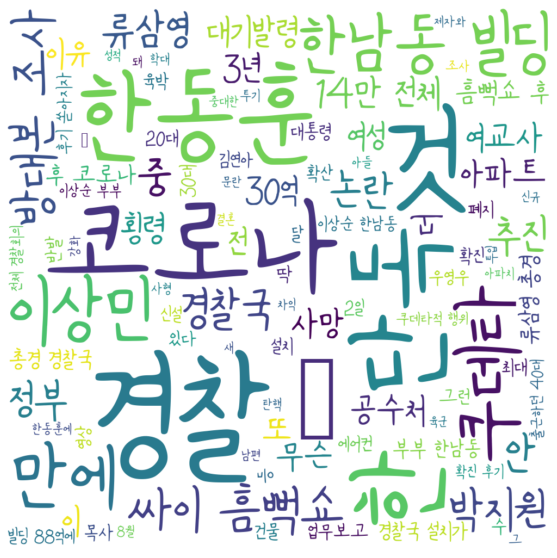

In [14]:
# 워드클라우드 시각화

#font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(font_path=font,
		background_color="white", 
		width=1000, 
		height=1000, 
		max_words=100, 
		max_font_size=300)
  
wc = wc.generate(filtered_title)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

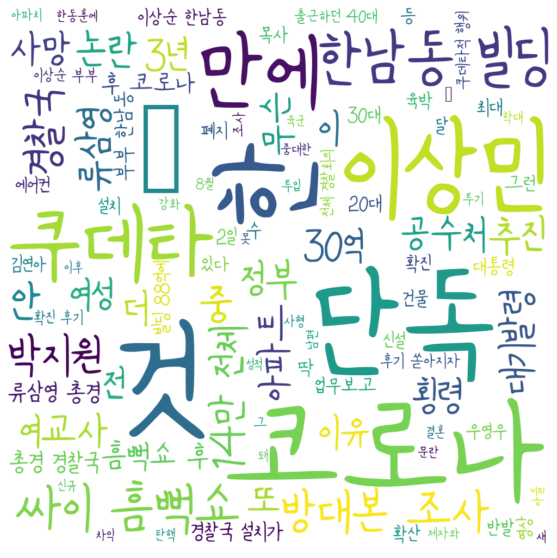

In [15]:
# 불용어 처리

stopword = set(STOPWORDS)
# 제거할 용어
stopword.add('한동훈')
stopword.add('경찰')

wc = WordCloud(font_path=font,
    stopwords = stopword,
		background_color="white", 
		width=1000, 
		height=1000, 
		max_words=100, 
		max_font_size=300)
  
wc = wc.generate(filtered_title)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()